<a href="https://colab.research.google.com/github/shreyagupta2405/EmotionDetection/blob/main/CK%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import zipfile
from PIL import Image
from pathlib import Path

zip_file_path = '/content/CK+ Dataset.zip'
extracted_path = '/content/CK+ dataset'
Path(extracted_path).mkdir(parents=True, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)
data_dir_list = os.listdir(extracted_path)

img_data_list = []
labels_list = []

for idx, dataset in enumerate(data_dir_list):
    img_list = os.listdir(os.path.join(extracted_path, dataset))
    min_images = min(len(img_list), len(os.listdir(os.path.join(extracted_path, data_dir_list[0]))))

    for i in range(min_images):
        img = img_list[i]
        input_img = cv2.imread(os.path.join(extracted_path, dataset, img))
        input_img_resize = cv2.resize(input_img, (48, 48))
        img_data_list.append(input_img_resize)
        labels_list.append(idx)

CKData = np.array(img_data_list, dtype='float32') / 255.0
CKDatalabels = np.array(labels_list)
num_classes = 7

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, classification_report

vectorizer = TfidfVectorizer(max_features=5000)

label_encoder = LabelEncoder()
nb_classifier = MultinomialNB()
tree_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

voting_classifier = VotingClassifier(estimators=[('rf', rf_classifier), ('svm', svm_classifier), ('nb', nb_classifier)], voting='soft')

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

from sklearn.utils import shuffle

labels = np.array(labels_list)
Y = to_categorical(CKDatalabels)
x, y = shuffle(CKData, Y, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
25/25 [==============================] - 5s 147ms/step - loss: 1.7865 - accuracy: 0.3406 - val_loss: 1.7351 - val_accuracy: 0.2386
Epoch 2/10
25/25 [==============================] - 3s 126ms/step - loss: 1.3408 - accuracy: 0.5191 - val_loss: 1.0474 - val_accuracy: 0.6447
Epoch 3/10
25/25 [==============================] - 3s 118ms/step - loss: 0.7638 - accuracy: 0.7270 - val_loss: 0.5662 - val_accuracy: 0.8020
Epoch 4/10
25/25 [==============================] - 3s 118ms/step - loss: 0.5115 - accuracy: 0.8087 - val_loss: 0.4203 - val_accuracy: 0.8528
Epoch 5/10
25/25 [==============================] - 4s 151ms/step - loss: 0.3135 - accuracy: 0.9145 - val_loss: 0.3137 - val_accuracy: 0.8579
Epoch 6/10
25/25 [==============================] - 3s 133ms/step - loss: 0.2198 - accuracy: 0.9413 - val_loss: 0.5098 - val_accuracy: 0.8376
Epoch 7/10
25/25 [==============================] - 3s 117ms/step - loss: 0.1889 - accuracy: 0.9503 - val_loss: 0.2089 - val_accuracy: 0.9289
Epoch 

In [ ]:
y_pred = model.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true_labels, y_pred_labels)
print("Accuracy:", accuracy)

report = classification_report(y_true_labels, y_pred_labels)
print("Classification Report:\n", report)

7/7 [==============================] - 0s 27ms/step
Accuracy: 0.9441624365482234
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        47
           1       0.80      0.75      0.77        16
           2       0.81      0.81      0.81        16
           3       1.00      1.00      1.00        30
           4       0.86      0.86      0.86        14
           5       0.95      0.91      0.93        23
           6       1.00      1.00      1.00        51

    accuracy                           0.94       197
   macro avg       0.91      0.90      0.91       197
weighted avg       0.94      0.94      0.94       197



In [ ]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [ ]:
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Classification Report:\n", report)

Accuracy: 0.3401015228426396
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.85      0.56        47
           1       0.64      0.44      0.52        16
           2       0.14      0.06      0.09        16
           3       0.29      0.23      0.26        30
           4       0.08      0.07      0.08        14
           5       0.18      0.13      0.15        23
           6       0.67      0.39      0.49        51

    accuracy                           0.40       197
   macro avg       0.34      0.31      0.31       197
weighted avg       0.41      0.40      0.37       197



In [ ]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

y_pred = tree_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Classification Report:\n", report)

Accuracy: 0.8426395939086294
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89        47
           1       0.94      1.00      0.97        16
           2       0.69      0.56      0.62        16
           3       0.84      0.87      0.85        30
           4       0.76      0.93      0.84        14
           5       0.78      0.78      0.78        23
           6       0.82      0.88      0.85        51

    accuracy                           0.84       197
   macro avg       0.83      0.84      0.83       197
weighted avg       0.84      0.84      0.84       197



In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Classification Report:\n", report)

Accuracy: 0.8781725888324873
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80        47
           1       1.00      0.44      0.61        16
           2       1.00      0.50      0.67        16
           3       1.00      0.97      0.98        30
           4       1.00      0.93      0.96        14
           5       1.00      0.83      0.90        23
           6       1.00      1.00      1.00        51

    accuracy                           0.88       197
   macro avg       0.95      0.81      0.85       197
weighted avg       0.92      0.88      0.88       197



In [ ]:
from sklearn.svm import SVC

X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

y_train_1d = np.argmax(y_train, axis=1)

svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
svm_classifier.fit(X_train_flat, y_train_1d)

y_pred = svm_classifier.predict(X_test_flat)

label_binarizer = LabelBinarizer()
label_binarizer.fit(range(max(y_pred)+1))
y_pred_one_hot = label_binarizer.transform(y_pred)

accuracy = accuracy_score(y_test, y_pred_one_hot)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred_one_hot)
print("Classification Report:\n", report)


Accuracy: 0.9847715736040609
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.84      1.00      0.91        16
           2       1.00      0.81      0.90        16
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        51

   micro avg       0.98      0.98      0.98       197
   macro avg       0.98      0.97      0.97       197
weighted avg       0.99      0.98      0.98       197
 samples avg       0.98      0.98      0.98       197



In [ ]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

y_train_1d = np.argmax(y_train, axis=1)

nb_classifier.fit(X_train_flat, y_train_1d)

y_pred = nb_classifier.predict(X_test_flat)

label_binarizer = LabelBinarizer()
label_binarizer.fit(range(max(y_pred)+1))
y_pred_one_hot = label_binarizer.transform(y_pred)

accuracy = accuracy_score(y_test, y_pred_one_hot)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred_one_hot)
print("Classification Report:\n", report)

Accuracy: 0.649746192893401
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86        47
           1       0.40      0.62      0.49        16
           2       0.33      0.31      0.32        16
           3       0.61      0.73      0.67        30
           4       0.21      0.21      0.21        14
           5       0.58      0.30      0.40        23
           6       0.84      0.80      0.82        51

   micro avg       0.65      0.65      0.65       197
   macro avg       0.55      0.55      0.54       197
weighted avg       0.66      0.65      0.65       197
 samples avg       0.65      0.65      0.65       197



In [ ]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

y_train_1d = np.argmax(y_train, axis=1)

voting_classifier.fit(X_train_flat, y_train_1d)

y_pred = voting_classifier.predict(X_test)

label_binarizer = LabelBinarizer()
label_binarizer.fit(range(max(y_pred)+1))
y_pred_one_hot = label_binarizer.transform(y_pred)

accuracy = accuracy_score(y_test, y_pred_one_hot)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred_one_hot)
print("Classification Report:\n", report)

Accuracy: 0.9746192893401016
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      0.81      0.90        16
           2       0.83      0.94      0.88        16
           3       0.97      1.00      0.98        30
           4       1.00      1.00      1.00        14
           5       1.00      0.96      0.98        23
           6       0.98      1.00      0.99        51

   micro avg       0.97      0.97      0.97       197
   macro avg       0.97      0.96      0.96       197
weighted avg       0.98      0.97      0.97       197
 samples avg       0.97      0.97      0.97       197



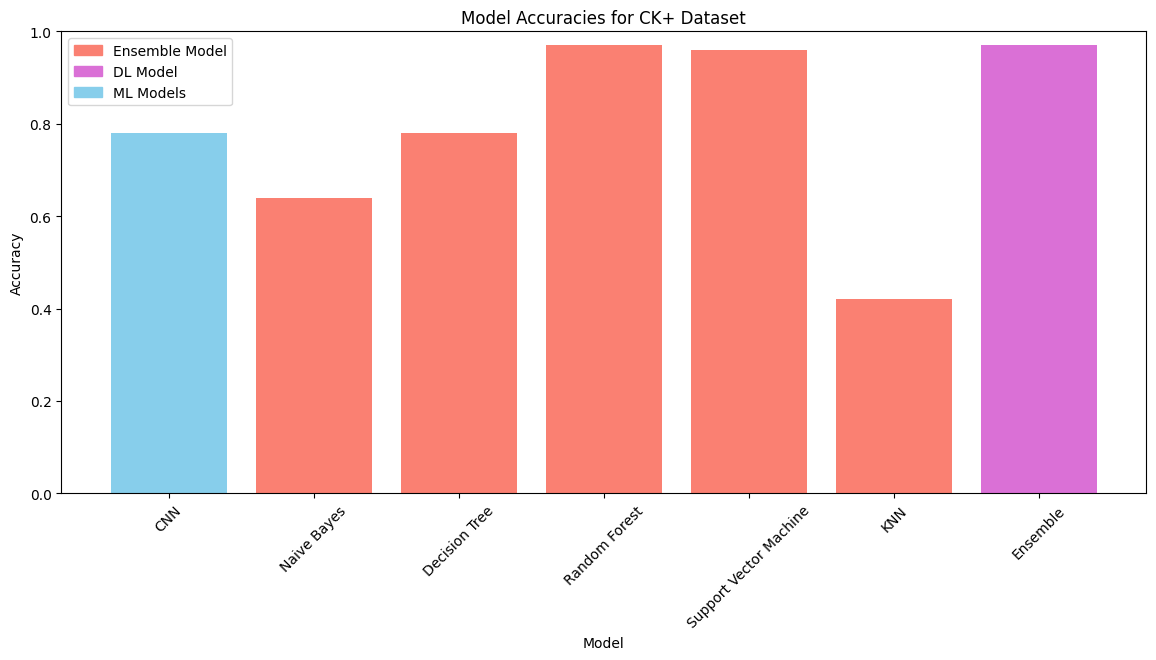

In [ ]:
import matplotlib.pyplot as plt

model_names = ['CNN', 'Naive Bayes', 'Decision Tree','Random Forest','Support Vector Machine','KNN', 'Ensemble']
accuracies = [0.78, 0.64, 0.78, 0.97, 0.96, 0.42, 0.97]

colors = ['skyblue'] * 1 + ['salmon'] * 5 + ['orchid']

plt.figure(figsize=(14, 6))
bars = plt.bar(model_names, accuracies, color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies for CK+ Dataset')

legend_labels = ['Ensemble Model', 'DL Model', 'ML Models']
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color) for color in set(colors)], labels=legend_labels)

plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()